## Placement Analysis — SIMPLE NOTEBOOK

In [1]:
# ============================================
# 🎓 Placement Analysis — Assignment Notebook
# ============================================

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## ---------- 1.1) Load Data ----------

In [5]:
DATA_PATH = "PrePlacement.csv" 
df = pd.read_csv(DATA_PATH)
print("✅ Dataset Loaded Successfully!") 
print(f"Total Rows: {len(df)}, Columns: {len(df.columns)}\n")

✅ Dataset Loaded Successfully!
Total Rows: 215, Columns: 15



In [6]:
# Display column names
print("📝 Columns in the dataset:")
for col in df.columns:
    print("-", col)

# Show first 5 rows
print("\n🔍 Sample Data (first 5 rows):")
display(df.head())

📝 Columns in the dataset:
- sl_no
- gender
- ssc_p
- ssc_b
- hsc_p
- hsc_b
- hsc_s
- degree_p
- degree_t
- workex
- etest_p
- specialisation
- mba_p
- status
- salary

🔍 Sample Data (first 5 rows):


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## ---------- 1.2 NaN % by column ----------

In [7]:
print("📊 Missing Value Analysis:\n")
nan_table = df.isna().sum().rename("Missing").to_frame()
nan_table["% Missing"] = (nan_table["Missing"] / len(df) * 100).round(2)
print(nan_table.to_string())
print("\n👉 Observation: All columns have 0% missing → Dataset is clean!\n")

📊 Missing Value Analysis:

                Missing  % Missing
sl_no                 0        0.0
gender                0        0.0
ssc_p                 0        0.0
ssc_b                 0        0.0
hsc_p                 0        0.0
hsc_b                 0        0.0
hsc_s                 0        0.0
degree_p              0        0.0
degree_t              0        0.0
workex                0        0.0
etest_p               0        0.0
specialisation        0        0.0
mba_p                 0        0.0
status                0        0.0
salary                0        0.0

👉 Observation: All columns have 0% missing → Dataset is clean!



In [9]:
# Helper flags
is_placed = df["status"].eq("Placed")
placed = df[is_placed].copy()

## ---------- Q1.3 ----------

In [10]:
not_placed_count = (~is_placed).sum()
print(f"1.3 ❌ Number of students NOT placed: {not_placed_count}\n")

1.3 ❌ Number of students NOT placed: 67



## ---------- Q1.4 ----------

In [11]:
print("1.4 🔍 Reason for Non-Placement (Score Comparison):\n")
placed_flag = is_placed.astype(int)
features = ["ssc_p","hsc_p","degree_p","etest_p","mba_p"]
rows = []
for c in features:
    mean_placed = df.loc[is_placed, c].mean()
    mean_not   = df.loc[~is_placed, c].mean()
    r, p = stats.pointbiserialr(placed_flag, df[c])
    rows.append([c, mean_placed, mean_not, mean_placed-mean_not, r, p])
reason_tbl = pd.DataFrame(rows, columns=["Feature","Mean Placed","Mean Not Placed","Diff","Corr(r)","p-value"])
print(reason_tbl.round(3).to_string(index=False))
print("\n👉 Strongest drivers: SSC%, HSC%, Degree% (placed students scored higher).\n")

1.4 🔍 Reason for Non-Placement (Score Comparison):

 Feature  Mean Placed  Mean Not Placed   Diff  Corr(r)  p-value
   ssc_p       71.721           57.544 14.177    0.608    0.000
   hsc_p       69.837           58.598 11.239    0.493    0.000
degree_p       68.724           61.134  7.589    0.481    0.000
 etest_p       73.238           69.588  3.650    0.128    0.062
   mba_p       62.579           61.613  0.967    0.077    0.261

👉 Strongest drivers: SSC%, HSC%, Degree% (placed students scored higher).



## ---------- Q1.5 ----------

In [12]:
s = placed["salary"].dropna()
m = placed["mba_p"].dropna()
common = s.index.intersection(m.index)
r, p = stats.pearsonr(placed.loc[common,"salary"], placed.loc[common,"mba_p"])
print(f"1.5 📈 Salary vs MBA% Correlation: r = {r:.3f}, p = {p:.5f}")
print("👉 Weak positive relation: Higher MBA% → Slightly higher salary.\n")

1.5 📈 Salary vs MBA% Correlation: r = 0.189, p = 0.02115
👉 Weak positive relation: Higher MBA% → Slightly higher salary.



## ---------- Q1.6 ----------

In [13]:
med_by_spec = placed.groupby("specialisation")["salary"].median().sort_values()
min_spec = med_by_spec.idxmin()
print("1.6 💼 Minimum Salary by Specialisation:")
print(med_by_spec.to_string())
print(f"👉 Lowest = {min_spec} with median salary {med_by_spec[min_spec]:.0f}\n")

1.6 💼 Minimum Salary by Specialisation:
specialisation
Mkt&HR     255000.0
Mkt&Fin    270000.0
👉 Lowest = Mkt&HR with median salary 255000



## ---------- Q1.7 ----------

In [14]:
cnt_above_500k = (placed["salary"] > 500000).sum()
print(f"1.7 💰 Students with salary > 500000: {cnt_above_500k}\n")

1.7 💰 Students with salary > 500000: 3



# ---------- Q1.8 ----------

In [16]:

valid = df[["etest_p","mba_p"]].dropna()
valid["etest_group"] = pd.qcut(valid["etest_p"], 3, labels=["Low","Med","High"])
groups = [g["mba_p"].values for _, g in valid.groupby("etest_group")]
F, p = stats.f_oneway(*groups)
decision = "✅ Significant difference" if p < 0.05 else "❌ No significant difference"
print(f"1.8 🧪 ANOVA (etest_p vs mba_p): F={F:.3f}, p={p:.5f} → {decision}\n")

1.8 🧪 ANOVA (etest_p vs mba_p): F=6.785, p=0.00139 → ✅ Significant difference



C:\Users\mukil\AppData\Local\Temp\ipykernel_20856\2551476359.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g["mba_p"].values for _, g in valid.groupby("etest_group")]


## ---------- Q1.9 ----------

In [18]:
a = placed.loc[placed["degree_t"]=="Sci&Tech","salary"].dropna()
b = placed.loc[placed["specialisation"]=="Mkt&HR","salary"].dropna()
t, p = stats.ttest_ind(a, b, equal_var=False)
decision = "✅ Means differ" if p < 0.05 else "❌ No difference"
print(f"1.9 🧪 t-test (Sci&Tech vs Mkt&HR salary): t={t:.3f}, p={p:.5f} → {decision}\n")

1.9 🧪 t-test (Sci&Tech vs Mkt&HR salary): t=2.550, p=0.01341 → ✅ Means differ



## ---------- Q1.10 ----------

In [20]:
mu, sd = placed["salary"].mean(), placed["salary"].std(ddof=0)
placed["salary_z"] = (placed["salary"] - mu) / sd
print(f"1.10 🔄 Standardized Salary (z-score): mean≈{mu:.0f}, std≈{sd:.0f}")
print("👉 'salary_z' column created.\n")

1.10 🔄 Standardized Salary (z-score): mean≈287076, std≈83573
👉 'salary_z' column created.



## ---------- Q1.11 ----------

In [21]:
prob_range = stats.norm.cdf(900000, mu, sd) - stats.norm.cdf(700000, mu, sd)
pdf_700 = stats.norm.pdf(700000, mu, sd)
pdf_900 = stats.norm.pdf(900000, mu, sd)
print(f"1.11 📊 P(700k–900k) = {prob_range:.10f}")
print(f"PDF@700k = {pdf_700:.3e}, PDF@900k = {pdf_900:.3e}\n")

1.11 📊 P(700k–900k) = 0.0000003889
PDF@700k = 2.387e-11, PDF@900k = 9.980e-18



# ---------- Q1.12 ----------

In [23]:
for var in ["etest_p","mba_p"]:
    A = df.loc[df["degree_t"]=="Sci&Tech", var].dropna()
    B = df.loc[df["degree_t"]!="Sci&Tech", var].dropna()
    t, p = stats.ttest_ind(A, B, equal_var=False)
    decision = "✅ Different" if p < 0.05 else "❌ Similar"
    print(f"1.12 🧪 {var}: t={t:.3f}, p={p:.5f} → {decision}")
print()

1.12 🧪 etest_p: t=0.139, p=0.88960 → ❌ Similar
1.12 🧪 mba_p: t=1.816, p=0.07225 → ❌ Similar



# ---------- Q1.13 ----------

In [24]:
corrs = placed[["ssc_p","hsc_p","degree_p","etest_p","mba_p","salary"]].corr()
top_feat = corrs["salary"].drop("salary").abs().idxmax()
print("1.13 🔗 Correlation with Salary:")
print(corrs["salary"].round(3))
print(f"👉 Most correlated feature: {top_feat}\n")

1.13 🔗 Correlation with Salary:
ssc_p       0.063
hsc_p       0.068
degree_p   -0.009
etest_p     0.186
mba_p       0.189
salary      1.000
Name: salary, dtype: float64
👉 Most correlated feature: mba_p



In [25]:
# ---------- Q1.14 ----------

C:\Users\mukil\anaconda3\envs\aiml\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


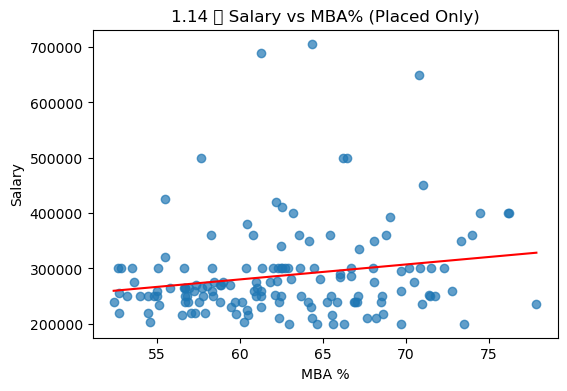

In [26]:
plt.figure(figsize=(6,4))
plt.scatter(placed["mba_p"], placed["salary"], alpha=0.7)
slope, intercept = np.polyfit(placed["mba_p"], placed["salary"], 1)
xv = np.linspace(placed["mba_p"].min(), placed["mba_p"].max(), 100)
plt.plot(xv, slope*xv+intercept, color="red")
plt.xlabel("MBA %")
plt.ylabel("Salary")
plt.title("1.14 📊 Salary vs MBA% (Placed Only)")
plt.show()